# Transform Dataset

## Clean Missing File Out

In [1]:
# Libaries
import json
import os
import pandas as pd

# Get data path
data_path = os.path.join(os.getcwd(), os.pardir, 'data')
print(os.path.abspath(data_path))

/home/zack/Projects/datasci-test/data


In [2]:
# WLASL Dataset
class_dict = {}

with open(os.path.join(data_path,"WLASL_v0.3.json"), 'r') as file:
    data = json.load(file)

In [3]:
# Missing Video List
missing_list = []
with open(os.path.join(data_path,'missing.txt'),'r') as file:
    for line in file.readlines():
        missing_list.append(line.strip())

In [4]:
# Create Cleaned Video Directories
cleaned_data = {}

for id in range(len(data)):
    did = data[id]
    gloss = did['gloss']
    instances = did['instances']
    cleaned_data[gloss] = []
    for j in range(len(instances)):
        video_id = instances[j]['video_id']
        if not video_id in missing_list:
            cleaned_data[gloss].append(video_id)

In [5]:
# Save cleaned Video Directories
cleaned_dir = os.path.join(data_path,'transform','cleaned_wlasl.json')
json_object = json.dumps(cleaned_data, indent=4)
with open(cleaned_dir, 'w') as file:
    file.write(json_object)

In [6]:
# Count each word
freq = []

for gloss, video_ids in cleaned_data.items():
    freq.append([gloss, len(video_ids)])

df = pd.DataFrame(freq, columns=['Gloss','Frequency'])
print("remaining video count: ",df['Frequency'].sum())

remaining video count:  11980


Almost 57% videos are left after cleaning

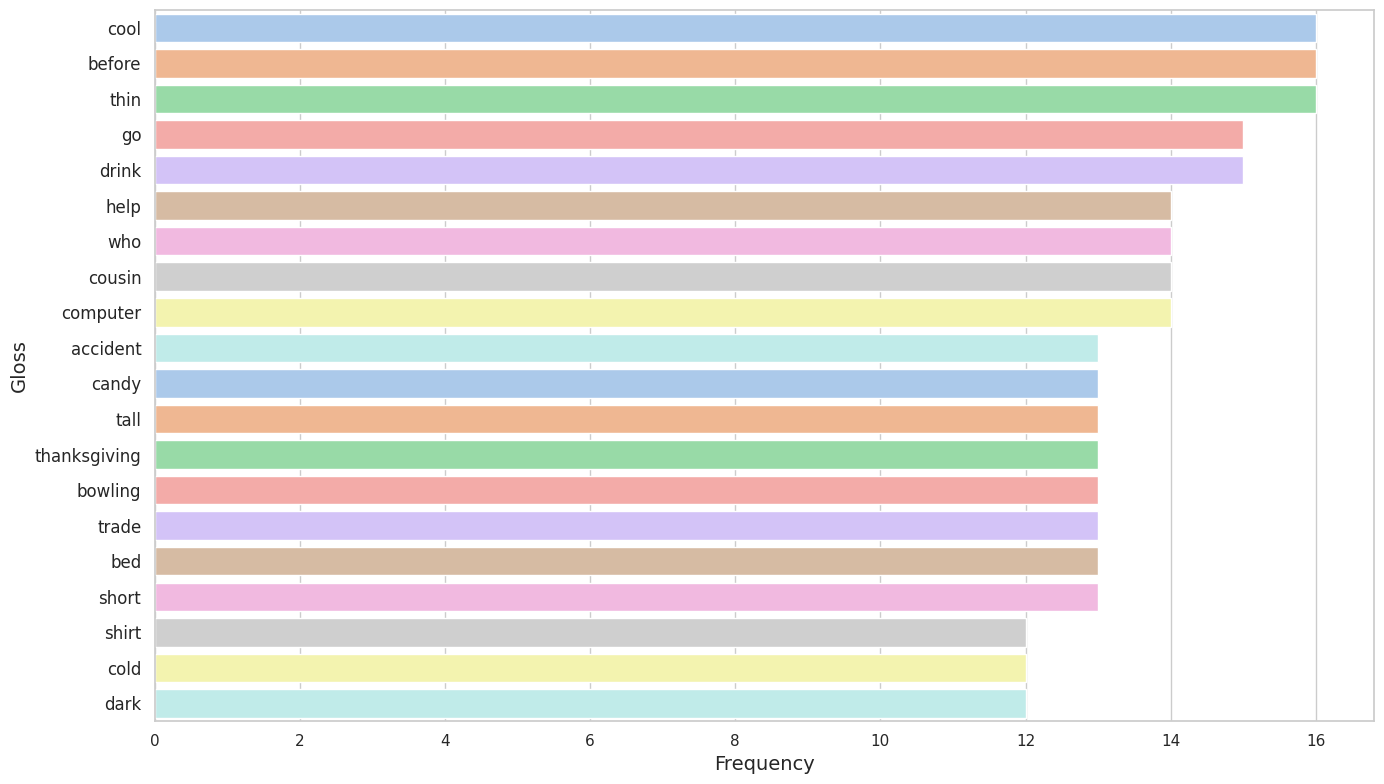

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the data in descending order of frequency
df = df.sort_values(by='Frequency', ascending=False)

# Create a Seaborn bar plot
plt.figure(figsize=(14, 8))  # Increase figure size
sns.set(style="whitegrid")

# Create the bar plot and set the font size for labels
ax = sns.barplot(x='Frequency', y='Gloss', data=df[0:20], palette="pastel")
ax.tick_params(axis='y', labelsize=12)  # Increase font size for y-axis labels

plt.xlabel('Frequency', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Gloss', fontsize=14)  # Increase font size for y-axis label

# Rotate y-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

## Copy Videos to Directories

In [22]:
# Libaries
import json
import os
import shutil

# Get data path
data_path = os.path.join(os.getcwd(), os.pardir, 'data/transform')
print(os.path.abspath(data_path))

/home/zack/Projects/datasci-test/data/transform


In [23]:
# Video directories
source_path = os.path.join(data_path, os.pardir, 'videos')
dest_path = os.path.join(data_path, 'videos')
print(os.path.abspath(source_path)+"\n"+os.path.abspath(dest_path))

/home/zack/Projects/datasci-test/data/videos
/home/zack/Projects/datasci-test/data/transform/videos


In [24]:
# Open cleaned directories
with open(os.path.join(data_path,"cleaned_wlasl.json"), 'r') as file:
    data = json.load(file)

In [26]:
# Save videos from a list of glosses
glosses = ['cool','thin','before','go','drink','help','who','cousin','computer','short']
n = 12
total = 0

for gloss in glosses:
    #count = len(data[gloss])
    print(f"{gloss}")
    #total += count # total video count
    
    destination_gloss = os.path.join(dest_path, gloss)
    if not os.path.exists(destination_gloss):
        os.mkdir(destination_gloss)
        
    for i in range(n):#len(data[gloss])):
        mp4_file = data[gloss][i]+".mp4"
        #source_file = os.path.join(source_path, mp4_file)
        #destination_file = os.path.join(destination_gloss, mp4_file)
        #shutil.copyfile(source_file, destination_file)
        print(f"|- {i} {mp4_file}")

    print('\n')
        
print("\ntotal ", total)

cool
|- 0 69281.mp4
|- 1 65403.mp4
|- 2 13213.mp4
|- 3 13197.mp4
|- 4 13216.mp4
|- 5 13217.mp4
|- 6 13198.mp4
|- 7 13199.mp4
|- 8 13200.mp4
|- 9 13201.mp4
|- 10 65402.mp4
|- 11 13202.mp4


thin
|- 0 57948.mp4
|- 1 57949.mp4
|- 2 57934.mp4
|- 3 57953.mp4
|- 4 57935.mp4
|- 5 57936.mp4
|- 6 57937.mp4
|- 7 66606.mp4
|- 8 57939.mp4
|- 9 57940.mp4
|- 10 57941.mp4
|- 11 57942.mp4


before
|- 0 05728.mp4
|- 1 05749.mp4
|- 2 05750.mp4
|- 3 05729.mp4
|- 4 05730.mp4
|- 5 65167.mp4
|- 6 05731.mp4
|- 7 05732.mp4
|- 8 05733.mp4
|- 9 05734.mp4
|- 10 05727.mp4
|- 11 05739.mp4


go
|- 0 69345.mp4
|- 1 24955.mp4
|- 2 24956.mp4
|- 3 24941.mp4
|- 4 24960.mp4
|- 5 24961.mp4
|- 6 24962.mp4
|- 7 65824.mp4
|- 8 24973.mp4
|- 9 24943.mp4
|- 10 24946.mp4
|- 11 24947.mp4


drink
|- 0 69302.mp4
|- 1 65539.mp4
|- 2 17710.mp4
|- 3 17733.mp4
|- 4 65540.mp4
|- 5 17734.mp4
|- 6 17711.mp4
|- 7 17712.mp4
|- 8 17713.mp4
|- 9 17709.mp4
|- 10 17720.mp4
|- 11 17721.mp4


help
|- 0 69364.mp4
|- 1 27221.mp4
|- 2 27206.mp4
|- 3

### Video Example

In [81]:
from IPython.display import Video

video_path = os.path.join(dest_path,"computer/12314.mp4")
print(video_path)
Video(os.path.abspath(video_path))

/home/zack/Projects/datasci-test/src/../data/transform/videos/computer/12314.mp4
